# Final Classifier for Music

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix

from scipy.io import arff

## Data Loading

In [2]:
def loadJSON(path):
    with open(path, 'r') as f:
        return json.load(f)

train_data_path = r'data/music_train_set.csv'
val_data_path = r'data/music_validation_set.csv'
feature_path = r'data/music_selected_features.txt'
feature_path = r'data/indixes_music.csv'
print("Start Program")
dataset_train = pd.read_csv(train_data_path)
print("Loaded training set")
dataset_val = pd.read_csv(val_data_path)
print("Loaded validation set")
#features = loadJSON(feature_path)
features = pd.read_csv(feature_path)
print("Loaded features")

dataset_train = dataset_train.sample(frac=1)

#X_train = dataset_train[features].values
y_train = np.array(dataset_train.iloc[:, -1])

non_music = dataset_train[y_train == 0]
music = dataset_train[y_train == 1][:len(dataset_train[y_train == 0])]
dataset_train = music.append(non_music, ignore_index=True).sample(frac=1)
y_train = np.array(dataset_train.iloc[:, -1])

#X_val = dataset_val[features].values
y_val = np.array(dataset_val.iloc[:, -1])

print("Split data")
#dataset_train[features].head()

X_train_pca = pd.read_csv(r'data/music_train_pca.csv')

y_train_pca = np.array(X_train_pca.iloc[:, -1])
non_music = X_train_pca[y_train_pca == 0]
music = X_train_pca[y_train_pca == 1][:len(X_train_pca[y_train_pca == 0])]
X_train_pca = music.append(non_music, ignore_index=True).sample(frac=1)
y_train_pca = np.array(X_train_pca.iloc[:, -1])
X_train_pca = X_train_pca.iloc[:,:-1].values

print("Loaded PCA training set")
X_val_pca = pd.read_csv(r'data/music_validation_pca.csv').values
y_val_pca = X_val_pca[:,-1]
X_val_pca = X_val_pca[:,:-1]
print("Loaded PCA validation set")

Start Program


FileNotFoundError: [Errno 2] File b'data/music_train_set.csv' does not exist: b'data/music_train_set.csv'

In [50]:
def getCost(y_true, y_pred):
    if len(y_true) != len(y_pred):
        print("Arrays are of two different lengths!!!")
        return -1000000
    # what is this?
    for index in len(y_true):
        print(index)

def plotROC(solution, prediction, classifierName):
    lw = 2
    fpr, tpr, _ = roc_curve(solution, prediction)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for {}'.format(classifierName))
    plt.legend()
    plt.show()
    
def getClassifiers():
    logistic_regression = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                         intercept_scaling=1, max_iter=100, multi_class='warn',
                                         n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
                                         tol=0.0001, verbose=0, warm_start=False)
    random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                                       max_depth=1000, max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, min_impurity_split=None,
                                       min_samples_leaf=2, min_samples_split=6,
                                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                                       oob_score=False, random_state=0, verbose=0, warm_start=False)
    nn = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
                   beta_2=0.999, early_stopping=False, epsilon=1e-08,
                   hidden_layer_sizes=100, learning_rate='constant',
                   learning_rate_init=0.001, max_iter=200, momentum=0.9,
                   n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
                   random_state=0, shuffle=True, solver='adam', tol=0.0001,
                   validation_fraction=0.1, verbose=False, warm_start=False)
    return [(logistic_regression,"logistic_regression"), (random_forest,"random_forest"), (nn,"Neural Network")]

## Train Logistic Regression

|Training on RF
Confusion Matrix: [0.32974458 0.07568371 0.07598487 0.51858684]
Accuracy: 0.8483314197519246


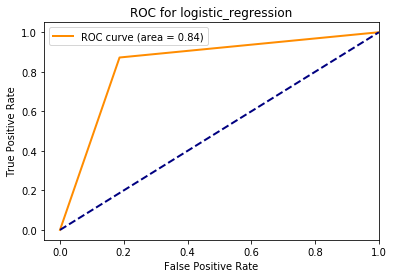

Confusion Matrix: [0.32076644 0.08466186 0.05275838 0.54181332]
Accuracy: 0.8625797587005214


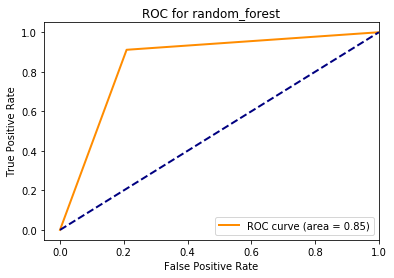

Confusion Matrix: [0.29658002 0.10884827 0.0410322  0.5535395 ]
Accuracy: 0.8501195204125807


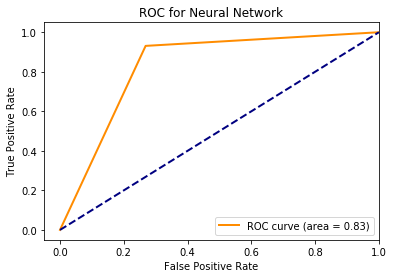

|Training on SVM
Confusion Matrix: [0.32511434 0.08031395 0.06753374 0.52703796]
Accuracy: 0.8521523085320635


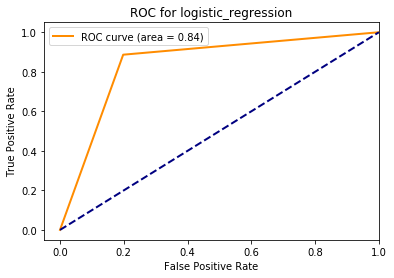

Confusion Matrix: [0.31924185 0.08618645 0.05241958 0.54215212]
Accuracy: 0.861393965630823


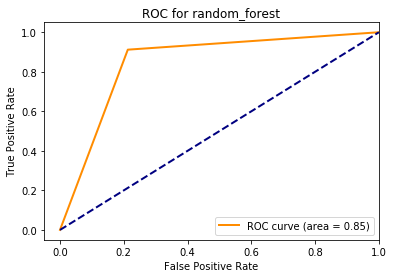

Confusion Matrix: [0.31624913 0.08917917 0.06280939 0.53176231]
Accuracy: 0.8480114438442282


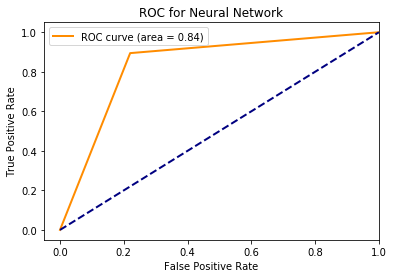

|Training on RForSVM
Confusion Matrix: [0.32773062 0.07769768 0.06804194 0.52652977]
Accuracy: 0.854260385100416


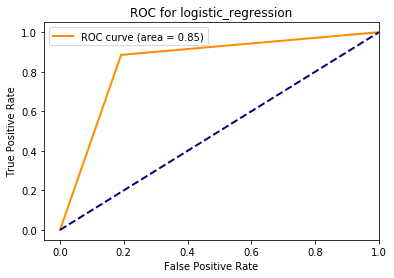

Confusion Matrix: [0.31984415 0.08558414 0.05292778 0.54164392]
Accuracy: 0.8614880761919103


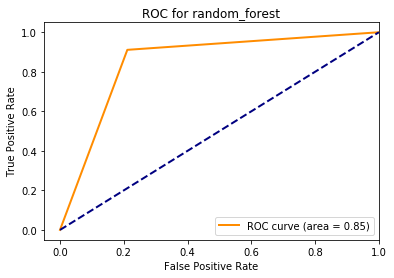

Confusion Matrix: [0.28916411 0.11626419 0.04285795 0.55171375]
Accuracy: 0.8408778633138211


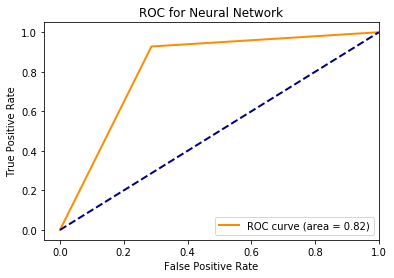

|Training on RFandSVM
Confusion Matrix: [0.3266954  0.0787329  0.07880818 0.51576352]
Accuracy: 0.8424589207400854


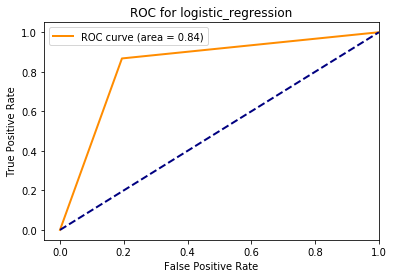

Confusion Matrix: [0.32101112 0.08441717 0.05232547 0.54224623]
Accuracy: 0.8632573547403489


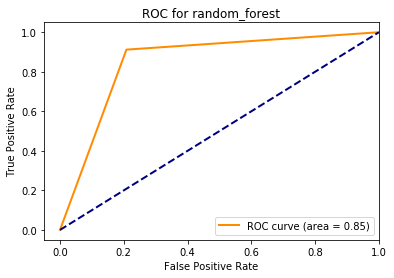

Confusion Matrix: [0.35639669 0.0490316  0.08756047 0.50701124]
Accuracy: 0.8634079316380884


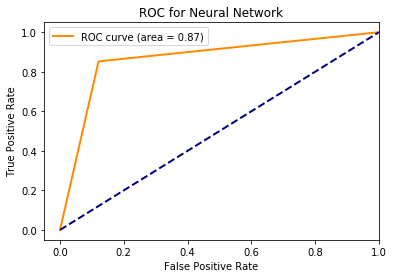

In [52]:
for column in features:
    f = features[column].dropna().tolist()
    print("===============================")
    print("|Training on {}".format(column))
    print("===============================")
    X_train = dataset_train[f].values
    X_val = dataset_val[f].values
    
    for classifier, name in getClassifiers():
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_val)
        print("Confusion Matrix: {}".format(confusion_matrix(y_val, y_pred).ravel()/len(y_pred)))
        print("Accuracy: {}".format(accuracy_score(y_val, y_pred)))
        plotROC(y_val, y_pred, name)

## Train PCA

Confusion Matrix: [4.05240076e-01 1.88221122e-04 4.73018502e-01 1.21553201e-01]
Accuracy: 0.5267932767415159


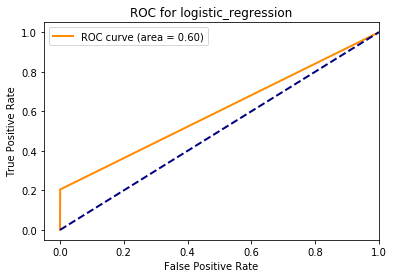

Confusion Matrix: [0.39119878 0.01422952 0.12396243 0.47060927]
Accuracy: 0.8618080520996066


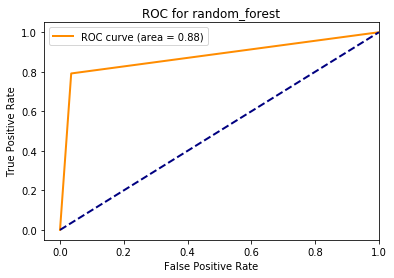

Confusion Matrix: [0.40403546 0.00139284 0.41867906 0.17589264]
Accuracy: 0.5799280995313294


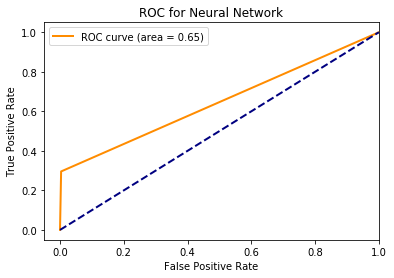

In [53]:
for classifier, name in getClassifiers():
    classifier.fit(X_train_pca, y_train_pca)
    y_pred = classifier.predict(X_val_pca)
    print("Confusion Matrix: {}".format(confusion_matrix(y_val, y_pred).ravel()/len(y_pred)))
    print("Accuracy: {}".format(accuracy_score(y_val, y_pred)))
    plotROC(y_val, y_pred, name)